In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('computer_games.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              1095 non-null   object
 1   Developer         1095 non-null   object
 2   Producer          1095 non-null   object
 3   Genre             1095 non-null   object
 4   Operating System  1095 non-null   object
 5   Date Released     1095 non-null   object
dtypes: object(6)
memory usage: 51.5+ KB


In [ ]:
df.describe()

df['Date Released'] = pd.to_datetime(df['Date Released'], errors='coerce')

In [ ]:
print("\n--- 1. Genel Veri Seti İncelemesi ---")
print(f"Toplam Oyun Sayısı: {df['Name'].nunique()}")
print(f"Benzersiz Janra Sayısı: {df['Genre'].nunique()}")
print(f"Benzersiz Platform Sayısı: {df['Operating System'].nunique()}")
print(f"Veri Seti Zaman Aralığı: {df['Date Released'].min().year} - {df['Date Released'].max().year}")


--- 1. Genel Veri Seti İncelemesi ---
Toplam Oyun Sayısı: 1094
Benzersiz Janra Sayısı: 282
Benzersiz Platform Sayısı: 83
Veri Seti Zaman Aralığı: 1985 - 2022


In [24]:
print("\n--- 2.1. En Popüler Janralar (Oyun Sayısına Göre) ---")
genre_counts = df['Genre'].value_counts().head(15) # En popüler 15 janra
print(genre_counts)


--- 2.1. En Popüler Janralar (Oyun Sayısına Göre) ---
Genre
First-person shooter    103
RTS                      48
Action-adventure         42
Sports                   34
Role-playing             33
RPG                      30
Action role-playing      29
Life simulation          27
Adventure                23
Racing                   22
Turn-based strategy      22
MMORPG                   20
Puzzle                   19
Real-time strategy       17
Survival horror          16
Name: count, dtype: int64


/tmp/ipython-input-27-830846709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


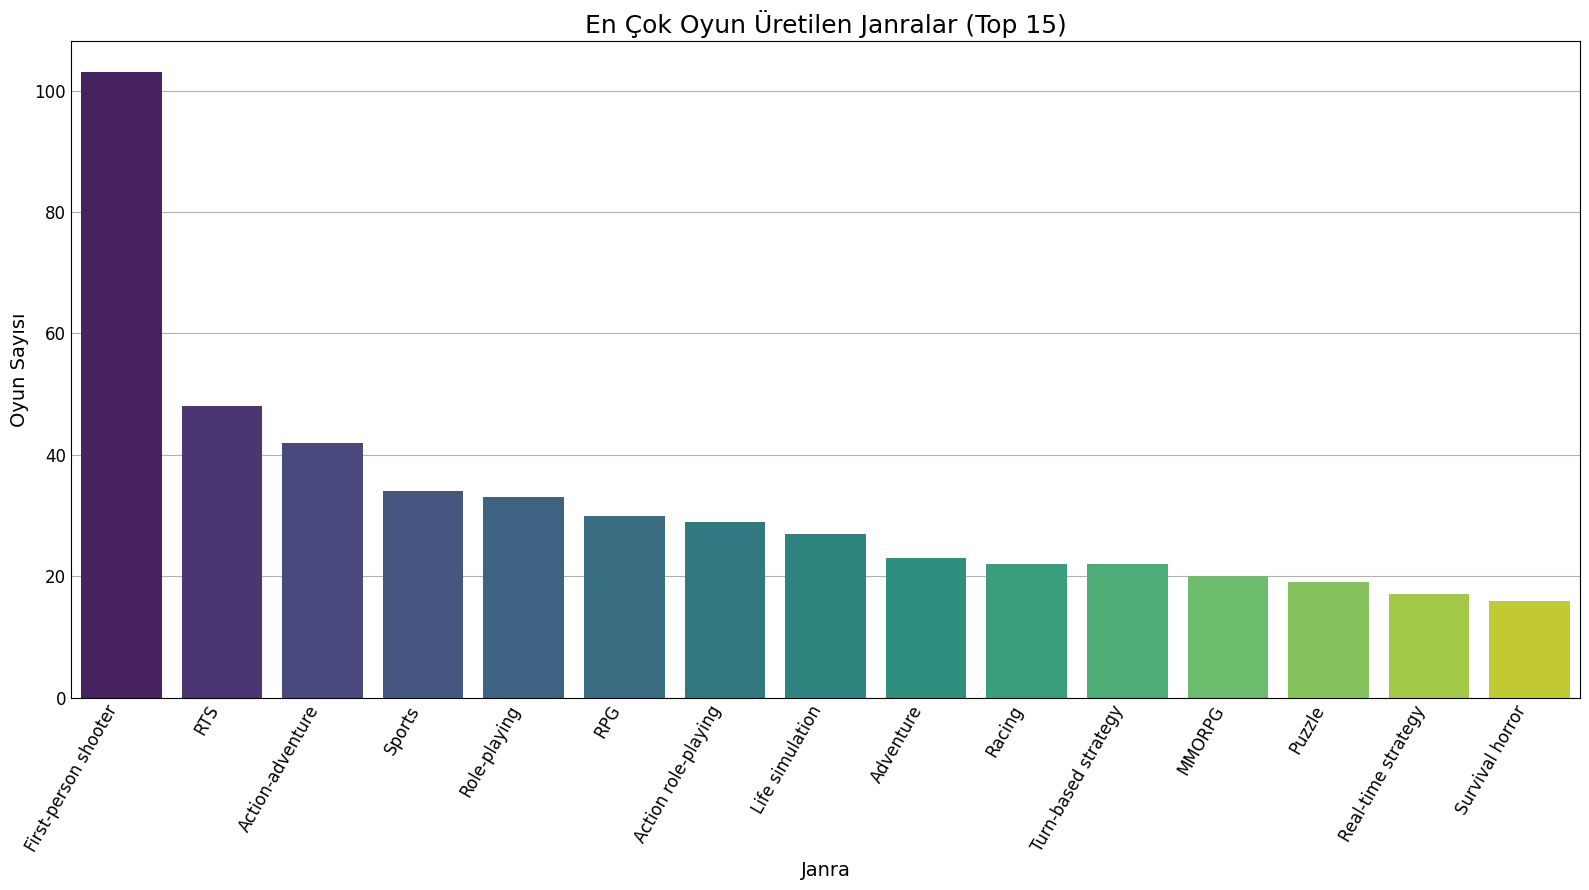

In [27]:
plt.figure(figsize=(16, 9))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('En Çok Oyun Üretilen Janralar (Top 15)', fontsize=18)
plt.xlabel('Janra', fontsize=14)
plt.ylabel('Oyun Sayısı', fontsize=14)
plt.xticks(rotation=60, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [40]:
print("\n--- 2.2. Zaman İçinde Janra Popülerliğindeki Değişim (Seçili Janralar) ---")
# En popüler ilk 5 janrayı alalım ve yıllara göre değişimini inceleyelim
top_genres = df['Genre'].value_counts().head(5).index.tolist()
genre_yearly_counts = df[df['Genre'].isin(top_genres)].groupby(['Date Released', 'Genre']).size().unstack(fill_value=0)
print(genre_yearly_counts)


--- 2.2. Zaman İçinde Janra Popülerliğindeki Değişim (Seçili Janralar) ---
Genre          Action-adventure  First-person shooter  RTS  Role-playing  \
Date Released                                                              
1990-10-31                    0                     0    0             0   
1991-06-15                    0                     0    0             0   
1993-12-10                    0                     1    0             0   
1994-09-30                    0                     1    0             0   
1994-11-23                    0                     0    1             0   
...                         ...                   ...  ...           ...   
2021-07-28                    0                     0    0             1   
2021-08-12                    0                     0    0             1   
2021-11-10                    0                     0    0             1   
2022-02-13                    0                     0    0             1   
2022-09-14  

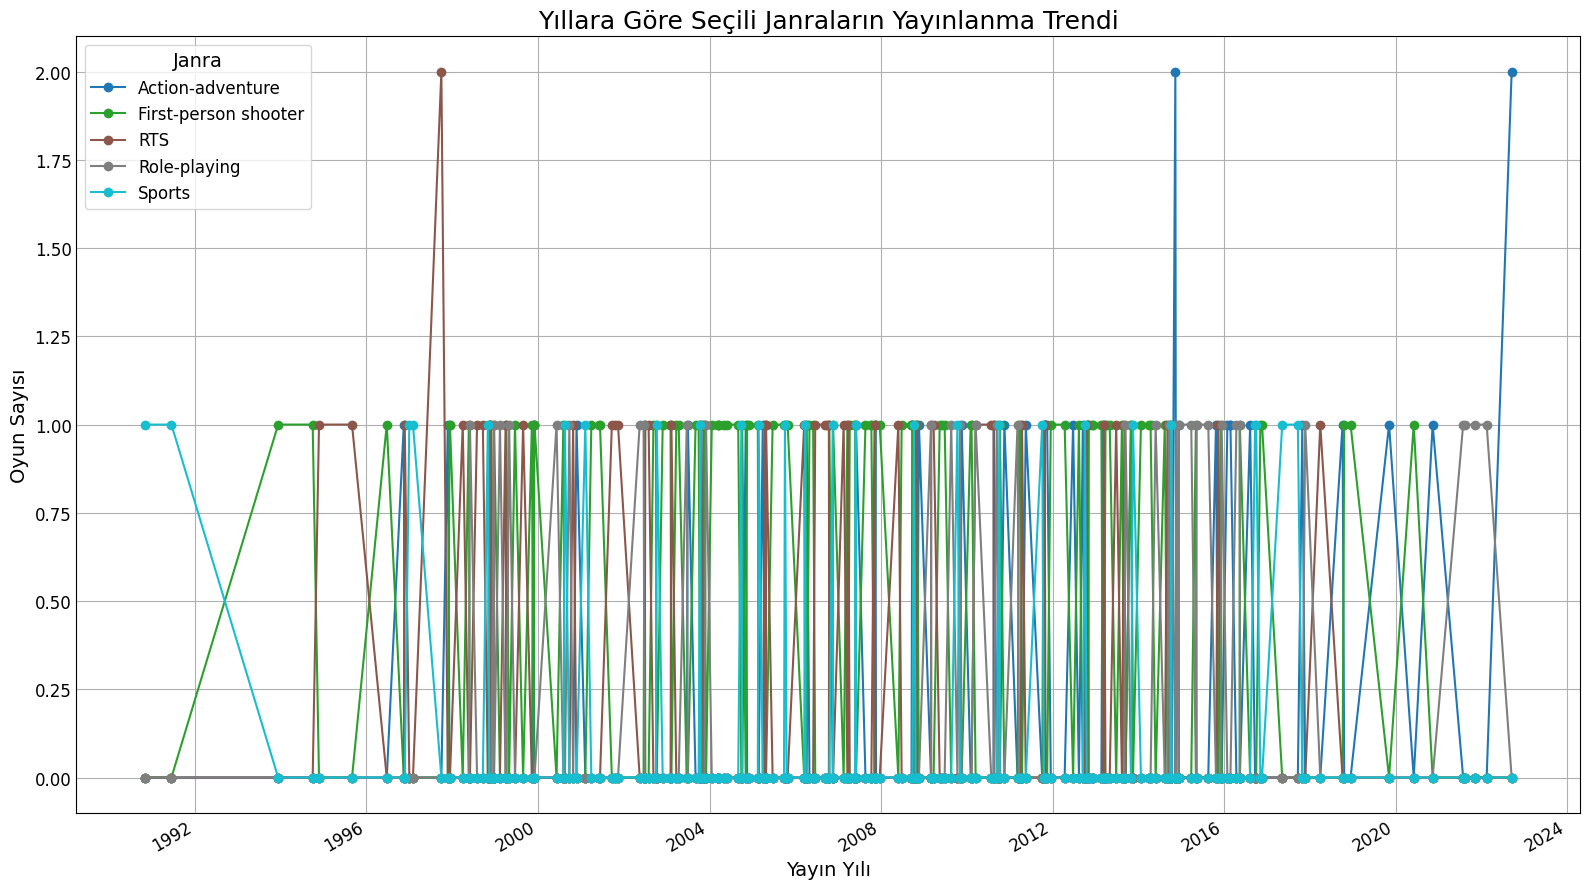

In [34]:
plt.figure(figsize=(16, 9))
genre_yearly_counts.plot(kind='line', marker='o', ax=plt.gca(), cmap='tab10')
plt.title('Yıllara Göre Seçili Janraların Yayınlanma Trendi', fontsize=18)
plt.xlabel('Yayın Yılı', fontsize=14)
plt.ylabel('Oyun Sayısı', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Janra', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
print("\n--- 3.1. En Popüler Platformlar (Oyun Sayısına Göre) ---")
platform_counts = df['Operating System'].value_counts().head(15) # En popüler 15 platform
print(platform_counts)



--- 3.1. En Popüler Platformlar (Oyun Sayısına Göre) ---
Operating System
Microsoft Windows                          600
Microsoft Windows, macOS                   191
Microsoft Windows, Linux, macOS            141
MS-DOS                                      27
Microsoft Windows, Linux                    15
Microsoft Windows, Mac OS X                  7
Microsoft Windows,                           6
DOS                                          5
Microsoft Windows, OS X, Linux               5
MS-DOS, Microsoft Windows                    5
Microsoft Windows, macOS, Linux              4
Microsoft Windows, MS-DOS                    4
Microsoft Windows, OS X                      3
Microsoft Windows, Linux, OS X               3
MS-DOS, Microsoft Windows, Linux, macOS      2
Name: count, dtype: int64


/tmp/ipython-input-41-4094823959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='magma')


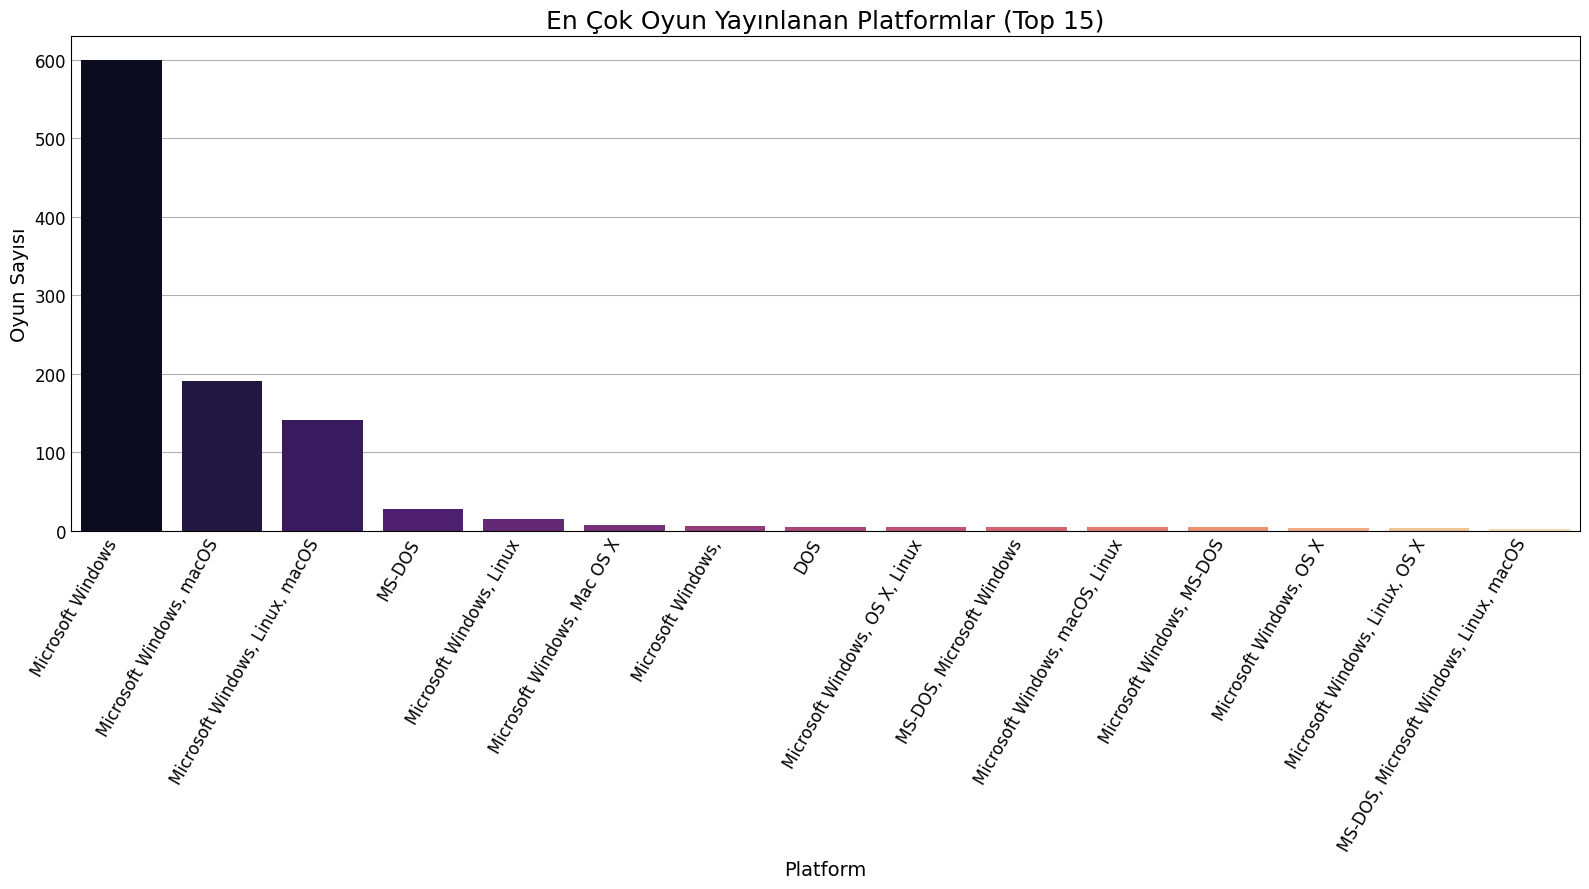

In [41]:
plt.figure(figsize=(16, 9))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='magma')
plt.title('En Çok Oyun Yayınlanan Platformlar (Top 15)', fontsize=18)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Oyun Sayısı', fontsize=14)
plt.xticks(rotation=60, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [43]:
print("\n--- 3.2. Yıllara Göre Platform Yayınlanma Trendleri (Seçili Platformlar) ---")
# En popüler ilk 5 platformu alalım
top_platforms = df['Operating System'].value_counts().head(5).index.tolist()
platform_yearly_counts = df[df['Operating System'].isin(top_platforms)].groupby(['Date Released', 'Operating System']).size().unstack(fill_value=0)
print(platform_yearly_counts)


--- 3.2. Yıllara Göre Platform Yayınlanma Trendleri (Seçili Platformlar) ---
Operating System  MS-DOS  Microsoft Windows  Microsoft Windows, Linux  \
Date Released                                                           
1989-04-20             1                  0                         0   
1990-04-16             1                  0                         0   
1990-10-31             0                  1                         0   
1991-07-01             1                  0                         0   
1991-12-12             1                  0                         0   
...                  ...                ...                       ...   
2021-12-16             0                  1                         0   
2022-01-14             0                  1                         0   
2022-02-13             0                  1                         0   
2022-06-22             0                  1                         0   
2022-09-14             0                  2   

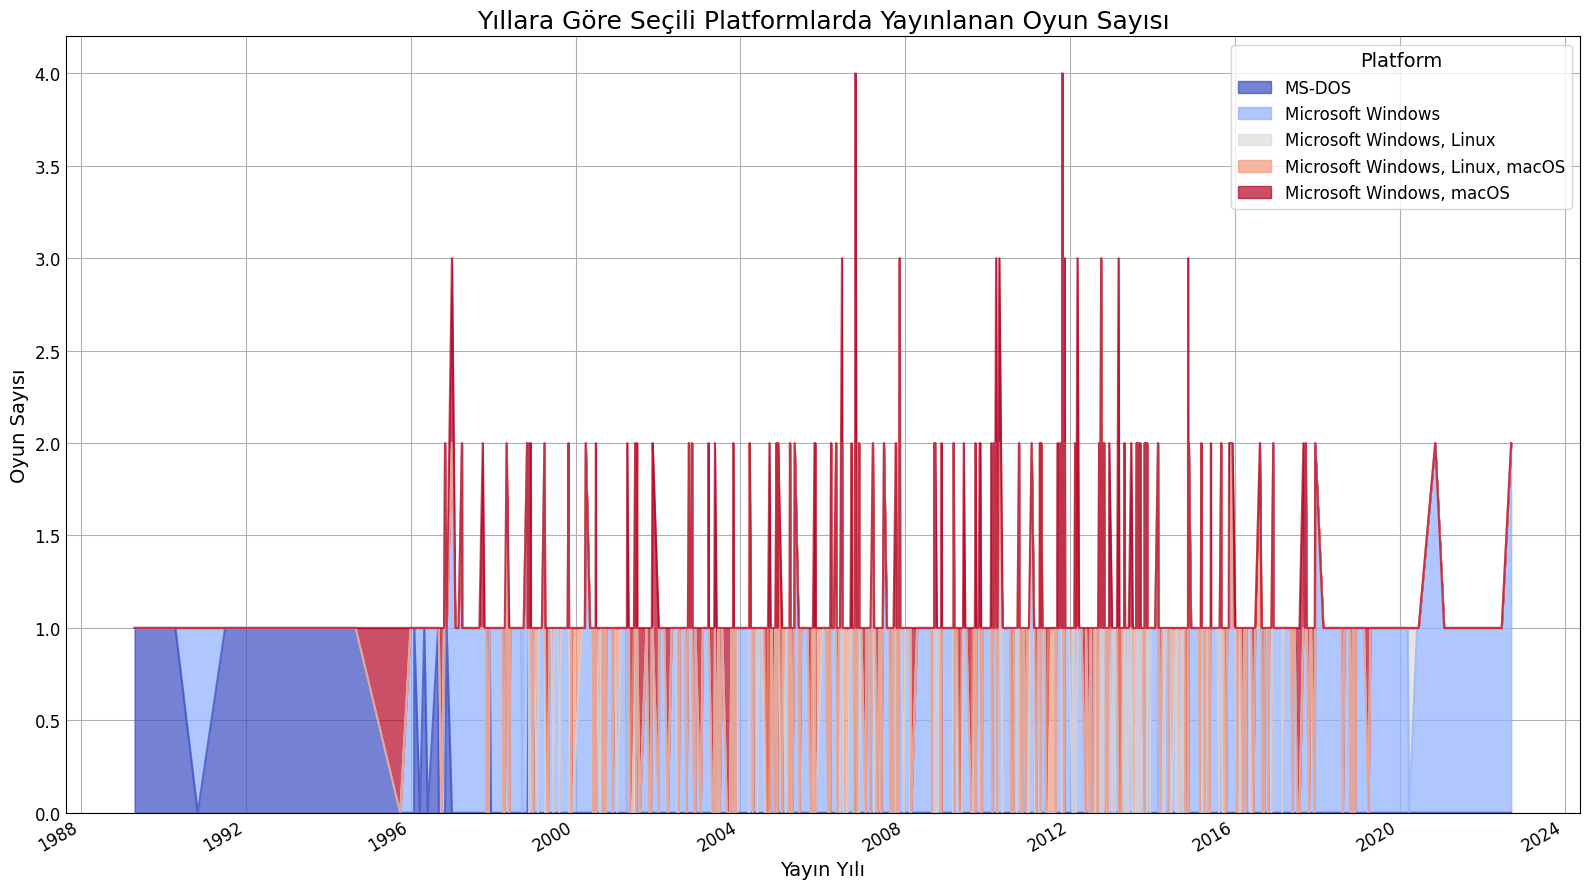

In [44]:
plt.figure(figsize=(16, 9))
platform_yearly_counts.plot(kind='area', stacked=True, ax=plt.gca(), cmap='coolwarm', alpha=0.7) # Stacked area plot
plt.title('Yıllara Göre Seçili Platformlarda Yayınlanan Oyun Sayısı', fontsize=18)
plt.xlabel('Yayın Yılı', fontsize=14)
plt.ylabel('Oyun Sayısı', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Platform', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
print("\n--- 4.1. Yıllara Göre Toplam Oyun Yayınlanma Trendi ---")
yearly_total_releases = df['Date Released'].value_counts().sort_index()


--- 4.1. Yıllara Göre Toplam Oyun Yayınlanma Trendi ---


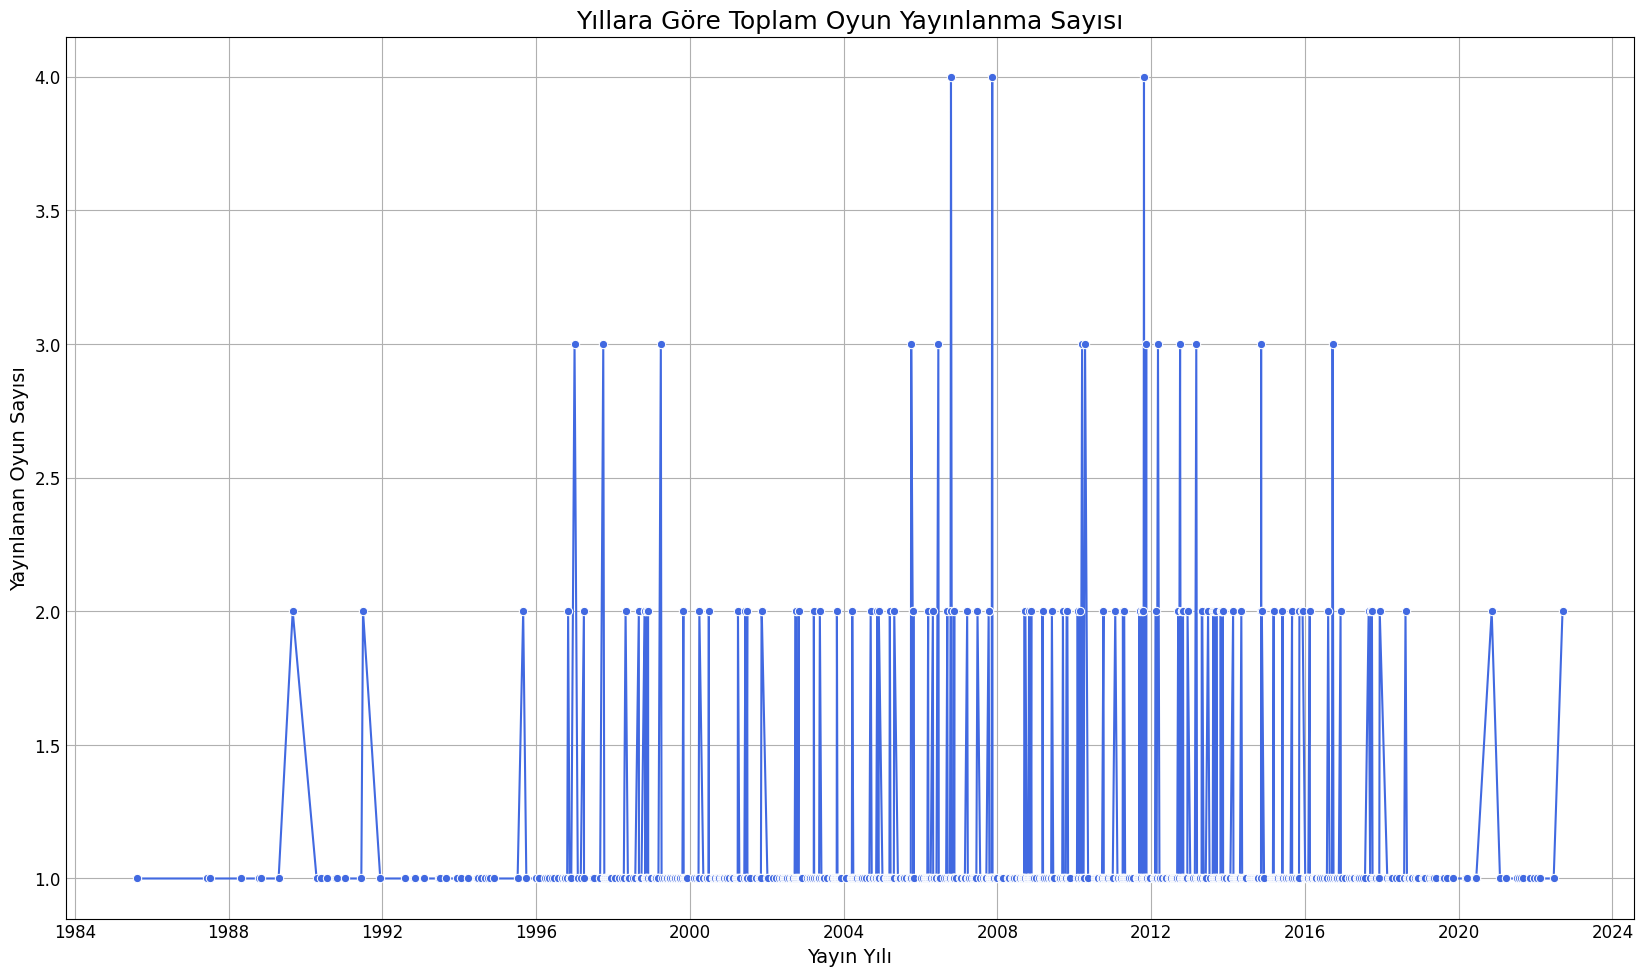

In [46]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=yearly_total_releases.index, y=yearly_total_releases.values, marker='o', color='royalblue')
plt.title('Yıllara Göre Toplam Oyun Yayınlanma Sayısı', fontsize=18)
plt.xlabel('Yayın Yılı', fontsize=14)
plt.ylabel('Yayınlanan Oyun Sayısı', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [48]:
print("\n--- 5. Janra ve Platform Kesişim Analizi ---")
top_10_genres = df['Genre'].value_counts().head(10).index
top_10_platforms = df['Operating System'].value_counts().head(10).index


--- 5. Janra ve Platform Kesişim Analizi ---


In [49]:
genre_platform_matrix = df[df['Genre'].isin(top_10_genres) & df['Operating System'].isin(top_10_platforms)]
genre_platform_pivot = genre_platform_matrix.groupby(['Genre', 'Operating System']).size().unstack(fill_value=0)

In [50]:
genre_platform_pivot = genre_platform_pivot.reindex(index=top_10_genres, columns=top_10_platforms, fill_value=0)


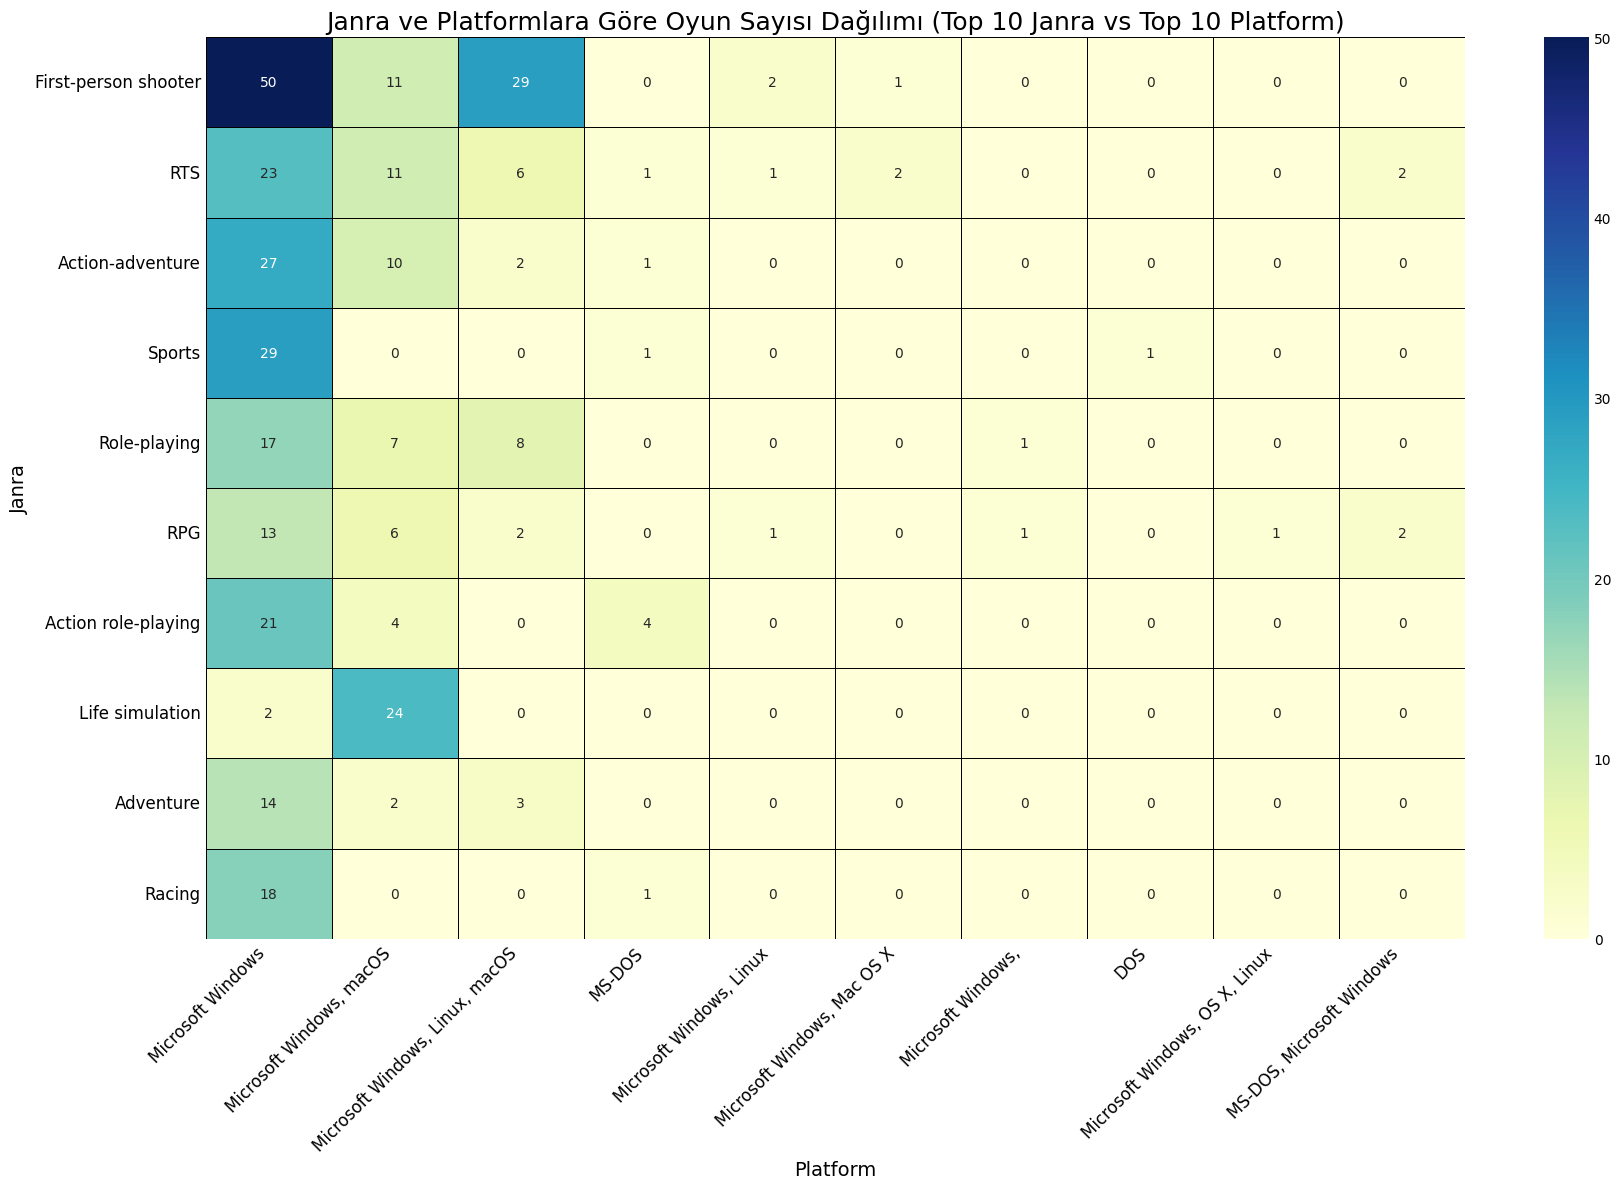

In [51]:
plt.figure(figsize=(18, 12))
sns.heatmap(genre_platform_pivot, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5, linecolor='black')
plt.title('Janra ve Platformlara Göre Oyun Sayısı Dağılımı (Top 10 Janra vs Top 10 Platform)', fontsize=18)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Janra', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()